In [105]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from math import*

In [106]:
%matplotlib inline

### 今回は半教師あり学習。

<img src="スクリーンショット 2016-10-14 20.53.37.png">

In [107]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### データを見てみる

In [108]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 各ラベルの意味
  ・Passengerld : ID
  ・Survived : 生存結果(1,0)
  ・Pclass : 階級
  ・Name : 名前
  ・Sex : 性別
  ・Age : 年齢
  ・SibSp : 兄弟、配偶者の数
  ・Parch : 子供の数
  ・Ticket : チケットの番号
  ・Fare : 運賃
  ・Cabin : 部屋番号
  ・Embarked : 乗船した港

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### AgeとCabinとEmbarkedには欠損値が存在している模様。

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### テストデータは約半分。Survivedを予測する。

In [111]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### データの下処理

ラベルだと扱いにくいため諸々を数値に変換

In [112]:
train["Sex"] = train["Sex"].replace("male",0).replace("female",1)

In [113]:
train["Embarked"] = train["Embarked"].replace("C",1).replace("Q",2).replace("S",3)

### 各ラベルが生存率にどのように関係しているのかを見てみる

In [114]:
#Surviveの値によってデータを分割
split_data = []
for did_survive in [0,1]:
    split_data.append(train[train.Survived==did_survive])

([array([ 0.00533461,  0.00800192,  0.03378587,  0.03082219,  0.01956024,
          0.01363289,  0.00711281,  0.00444551,  0.00266731,  0.00029637]),
  array([ 0.01559914,  0.00823288,  0.02729849,  0.02816511,  0.02253209,
          0.01039942,  0.0090995 ,  0.00389978,  0.        ,  0.00043331])],
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 2 Lists of Patches objects>)

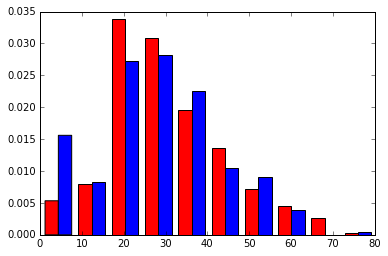

In [115]:
#年齢(Age)
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp,normed=True,color=["red","blue"],alpha=1.0)

青が生存で赤が死亡。10歳以下の子供の生存率が非常に高いことが見て取れる。逆に10代後半から30代前半までの動けそうな世代は死亡率が高い。

([array([ 468.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   81.]),
  array([ 109.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  233.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

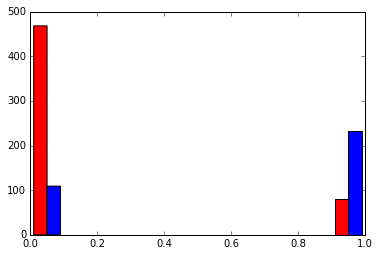

In [116]:
#性別(Sex)
temp = [i["Sex"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

kaggleのサイトには[1,0]のどちらがどの性別を表すのかは示されていなかったが赤の方が死亡率が高いことから[0]が女性じゃないかなと思う。

([array([  80.,    0.,    0.,    0.,    0.,   97.,    0.,    0.,    0.,  372.]),
  array([ 136.,    0.,    0.,    0.,    0.,   87.,    0.,    0.,    0.,  119.])],
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 2 Lists of Patches objects>)

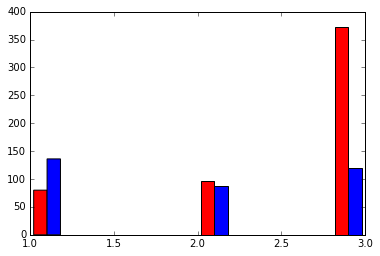

In [117]:
#階級(Pclass)
temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

(1 = 1st; 2 = 2nd; 3 = 3rd)と公式サイトにあるので階級が高い人が生き残る確率が高いのがわかる。

([array([ 499.,   36.,    8.,    0.,    4.,    2.,    0.,    0.,    0.,    0.]),
  array([ 233.,   70.,   23.,    2.,    7.,    4.,    0.,    0.,    0.,    3.])],
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 2 Lists of Patches objects>)

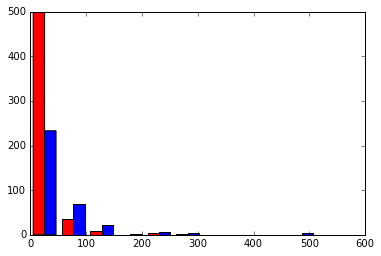

In [118]:
#運賃(Fare)
temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

階級と一緒で運賃も安い人の方が死亡する確率が高い。運賃が500っていう外れ値として扱ってもいいようなお金持ちの人もいる。もちろん助かってる。

([array([ 445.,   53.,    0.,   40.,    0.,    2.,    4.,    0.,    4.,    1.]),
  array([ 233.,   65.,    0.,   40.,    0.,    3.,    0.,    0.,    1.,    0.])],
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 2 Lists of Patches objects>)

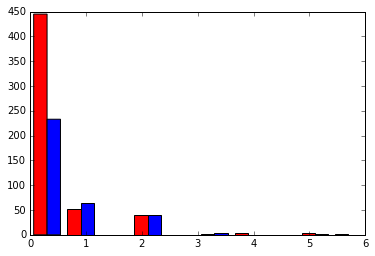

In [119]:
#配偶者・子供の数(Parch)
temp = [i["Parch"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

独身の人の死亡率がかなり高いのが見受けられる。あとは横一線。

([array([ 398.,   97.,   15.,   12.,    0.,   15.,    5.,    0.,    0.,    7.]),
  array([ 210.,  112.,   13.,    4.,    0.,    3.,    0.,    0.,    0.,    0.])],
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 2 Lists of Patches objects>)

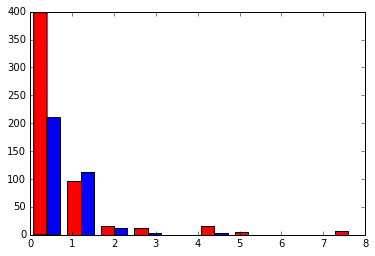

In [120]:
#兄弟・親戚の数(SibSp)
temp = [i["SibSp"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

これもやはり兄弟・親戚の数が少ない人の方が死亡率が高い。

([array([  75.,    0.,    0.,    0.,    0.,   47.,    0.,    0.,    0.,  427.]),
  array([  93.,    0.,    0.,    0.,    0.,   30.,    0.,    0.,    0.,  217.])],
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 2 Lists of Patches objects>)

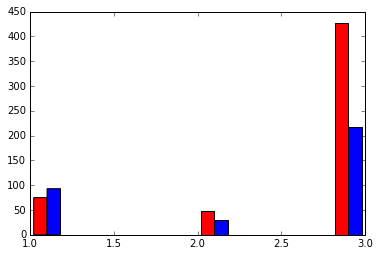

In [121]:
#乗降した港(Embarked)
temp = [i["Embarked"].dropna() for i in split_data]
plt.hist(temp,color=["red","blue"],alpha=1.0)

(C = Cherbourg; Q = Queenstown; S = Southampton)のうちのCherbourgから乗降した人の死亡率が高い。

### 欠損値の処理

In [122]:
#中央値を代入
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mean())

Ageは欠損率が高いのでlinear_regressionを使って欠損値を予測

In [123]:
#テスト用データを用意
test_data = train[train["Age"].isnull()]
test_data = test_data[["Survived","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
#訓練用データを用意
train_data = train[train["Age"].isnull() == False]
train_data_y = train_data["Age"]
train_data_x = train_data[["Survived","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]

In [124]:
from sklearn import linear_model 
linear = linear_model.LinearRegression()
linear.fit(train_data_x, train_data_y)
preds = linear.predict(test_data)

予測したのに調べてみたら欠損値の補完メソッドにlinearがあった。

In [125]:
train["Age"] = train["Age"].interpolate(method='linear')

In [126]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0
5,6,0,3,"Moran, Mr. James",0,44.5,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1.0


できてる。

### 半教師あり学習
今回は学習目的であるSurvivedに全て教師データが付与されているが教師データありと無しの半分に分けて学習を行う。

In [127]:
#下処理
train = train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
train_2 = train
train_teacher = train[:500]
train_non_teacher = train[500:].drop("Survived",axis=1)

In [128]:
#教師なしデータを予測して結合
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(train_teacher.drop("Survived",axis=1),train_teacher["Survived"]).predict(train_non_teacher)
train_non_teacher["Survived"] = pd.Series(pred, index=train_non_teacher.index)
train = pd.concat([train_teacher,train_non_teacher])

In [129]:
pred_local = gnb.fit(train.drop("Survived",axis=1),train["Survived"]).predict(train.drop("Survived",axis=1))

識別器のローカルテストを行う。

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_local,train["Survived"])

0.88103254769921435

テストデータに対して予測を行う

In [131]:
test["Sex"] = test["Sex"].replace("male",0).replace("female",1)
test["Embarked"] = test["Embarked"].replace("C",1).replace("Q",2).replace("S",3)
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
test["Age"] = test["Age"].interpolate(method='linear')
test_id = test["PassengerId"]
test = test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [132]:
predict = pd.DataFrame(gnb.fit(train.drop("Survived",axis=1),train["Survived"]).predict(test),columns=["Survived"])

In [133]:
pd.concat([test_id,predict],axis=1).to_csv("pred_result.csv",index=False)

<img src="スクリーンショット 2016-10-20 19.29.37.png">

###  順位低いけど終わり！！

### 教師あり学習の場合の結果も見てみる

In [140]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,3
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,3
4,3,1,22.0,1,1,12.2875,3
5,3,0,14.0,0,0,9.2250,3
6,3,1,30.0,0,0,7.6292,2
7,2,0,26.0,1,1,29.0000,3
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,3


In [141]:
test = pd.concat([test_id.astype(np.int64),pd.DataFrame(gnb.fit(train_2.drop("Survived",axis=1),train_2["Survived"]).predict(test),columns=["Survived"])],axis=1)

なぜか教師あり学習でのローカルテストの結果が下がった。

In [145]:
test.to_csv("./test2.csv",index=False)

In [ ]:
test["PassengerId"].isnull()

In [ ]:
test_id.astype(np.int64)
test_id